<p style="font-size:300%; background-color:gray; color:white; text-align:center;line-height : 80px; margin : 0; padding : 0;">
Tarea 2. Transformadas sobre imágenes</p>
<p style="font-size:240%; background-color:gray; color:white; text-align:center;line-height : 60px; margin : 0; padding : 0;">
Visión de Máquina</p1>

<p style="font-size:200%; text-align:center; line-height : 40px;  margin-top : 0; margin-bottom : 0; "> <br>Jefferson Javier Hernández Panqueba</p>
<p style="font-size:160%; text-align:center; line-height : 20px; margin-top : 0; "> email: jejhernandezpa@unal.edu.co</p>
<p style="font-size:200%; text-align:center; line-height : 40px;  margin-top : 0; margin-bottom : 0; "> 
<br>Jaime Andrés Castillo León</p>
<p style="font-size:160%; text-align:center; line-height : 20px; margin-top : 0; "> email:jacastillol@unal.edu.co</p>
<p style="font-size:180%; text-align:center; line-height : 30px;  margin-top : 0; margin-bottom : 0; "> <br><p style="font-size:160%; text-align:center; line-height : 30px; margin-top : 0; "> <br>28 de Febrero de 2018</p>

<h1 style="font-size:200%; background-color:gray; color:white; text-align:center; line-height : 60px;">
Contenido </h1>

<ol style="font-size:120%; line-height : 35px;">
    <li>
        <h3>Implemente (busque) un código para determinar, en el caso de señales bidimensionales (imágenes), alguna de las siguientes transformadas</h3>
        <ul>
            <li>Transformada de Hartley</li>
            <li>Transformada de Walsh-Hadamard</li>
       </ul>
    </li>
    <li>
        <h3>Analice detalladamente el comportamiento, de al menos cuatro de las transformadas estudiadas, cuando ellas son empleadas para compresión de imágenes. Utilice imágenes reales y sintéticas</h3>
    </li>
    <li>
        <h3>Analice detalladamente el comportamiento, de al menos cuatro de las transformadas estudiadas, cuando ellas son empleadas para reducción de ruido de imágenes. Utilice imágenes reales y sintéticas</h3>
    </li>
</ol>


<h1 style="font-size:100%; background-color:rgba(150, 150, 150, 1.0); color:white; text-align:center; line-height : 30px;">
Visión de Máquina &#8212; J.J. Hernández & J.A. Castillo </h1>

In [28]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import cv2

from scipy import fftpack

1) Implemente (busque) un código para determinar, en el caso de señales bidimensionales, alguna de las siguientes transformadas

In [29]:
from fht import fht  # fast hartley transform (to install with: pip install fht)

def hartley_transform(img):
    return fht(img)

In [30]:
# hadamard transform

from scipy.linalg import hadamard

def hadamard_transform(img):
    if img.shape[0] != img.shape[1]:
        raise ValueError('Image shape must be squared')
    had = hadamard(img.shape[0])
    return np.dot(img, had) / img.shape[0]

In [31]:
def get_2D_dct(img):
    return fftpack.dct(fftpack.dct(img.T, norm='ortho').T, norm='ortho')

def get_2D_idct(coefficients):
    return fftpack.idct(fftpack.idct(coefficients.T, norm='ortho').T, norm='ortho')

In [32]:
def fft_centered(img):
    output = np.fft.fftshift(np.fft.fft2(img)) 
    return np.abs(output)

In [33]:
# funcion para mostrar las imágenes de acuerdo con las transformaciones dadas
def show_image(img_path, transformations=[], apply=np.log10, labels=[]):
    img = cv2.imread(img_path, 0)
    img = cv2.resize(img, (256, 256), interpolation=cv2.INTER_CUBIC).astype(np.int32)
    # transformed_img = transform(img)
    
    cols = len(transformations) + 1
    fig, axes = plt.subplots(nrows=1, ncols=cols, squeeze=False, figsize=(15, 15))
    current_ax = axes[0, 0]
    current_ax.set_title('Input image')
    current_ax.imshow(img, cmap='gray')
    current_ax.set_xticks([])
    current_ax.set_yticks([])
    
    
    for i in range(1, cols):
        current_ax = axes[0, i]
        transform = transformations[i - 1]
        label = labels[i - 1] if i - 1 < len(labels) else transform.__name__
        
        current_ax.set_title(label)
        output_transform = apply(transform(img))
        current_ax.imshow(output_transform, cmap=plt.cm.gray)
        current_ax.set_xticks([])
        current_ax.set_yticks([])
    
    plt.show()

#### Ejemplo de las transformaciones usando imágenes sintéticas

In [34]:
import os

syntetic_image_dir = 'img/syntetic'
real_image_dir = 'img/real'

syntetic_images_paths = list(map(lambda x: syntetic_image_dir + '/' + x, os.listdir(syntetic_image_dir)))
real_images_paths = list(map(lambda x: real_image_dir + '/' + x, os.listdir(real_image_dir)))

print(syntetic_images_paths, real_images_paths)#

['img/syntetic/cv5.png', 'img/syntetic/cv1.png', 'img/syntetic/cv3.png', 'img/syntetic/cv2.png', 'img/syntetic/cv7.png', 'img/syntetic/cv6.png', 'img/syntetic/cv4.png'] ['img/real/img2.png', 'img/real/img.png', 'img/real/img3.png']


/home/jefferson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log10
/home/jefferson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in log10


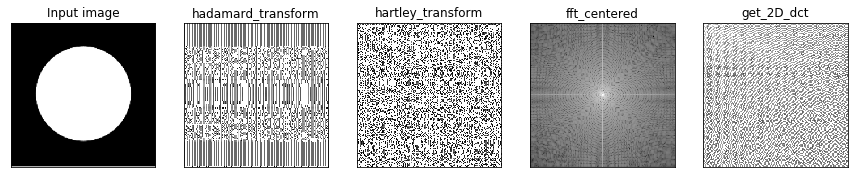

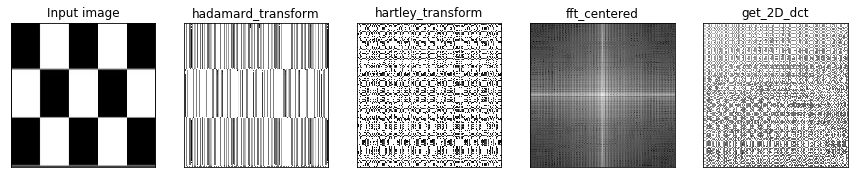

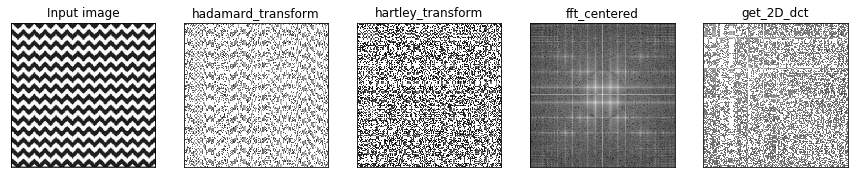

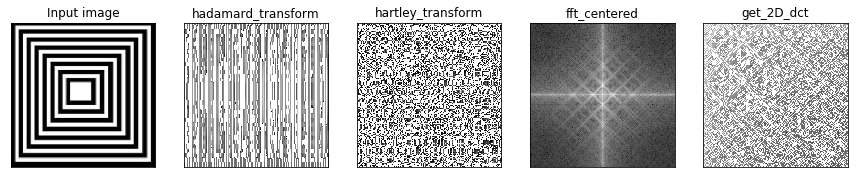

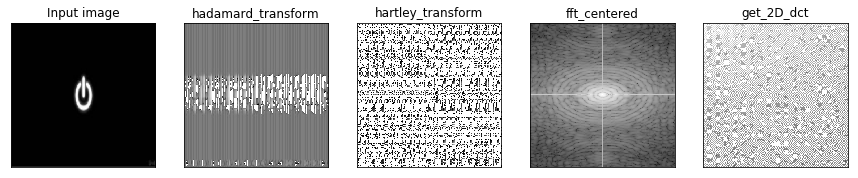

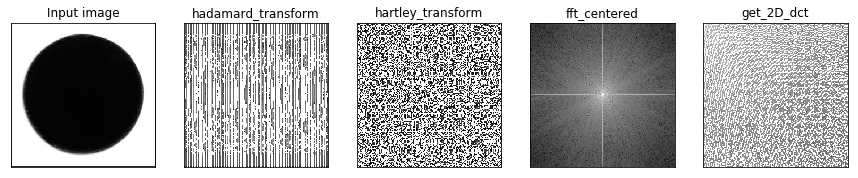

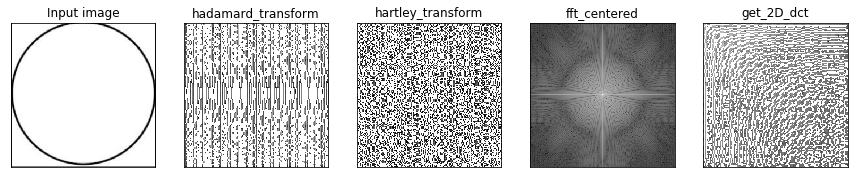

In [35]:
for p in syntetic_images_paths:
    show_image(p, [hadamard_transform, hartley_transform, fft_centered, get_2D_dct])

#### Ejemplo de las transformaciones usando Imágenes reales

/home/jefferson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log10
/home/jefferson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in log10


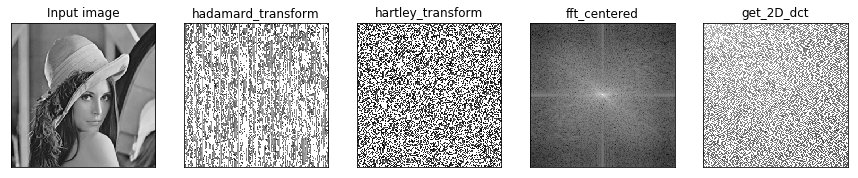

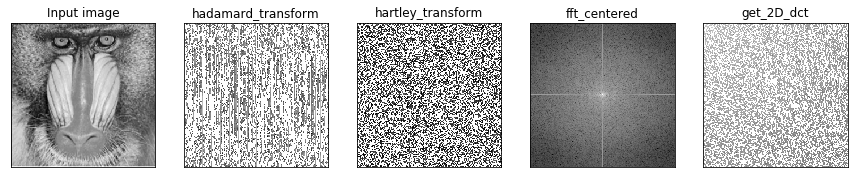

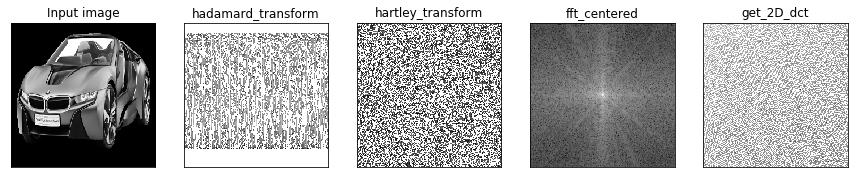

In [36]:
for p in real_images_paths:
    show_image(p, [hadamard_transform, hartley_transform, fft_centered, get_2D_dct])

# Punto 2

Analice detalladamente el comportamiento, de al menos cuatro de las transformadas estudiadas, **cuando ellas son empleadas para compresión de imágenes.** Utilice imágenes reales y sintéticas

In [37]:
from PIL import Image

def compress_fft(img, eps=2000):
    spec = np.fft.fft(img)
    spec[abs(spec) < eps] = 0
    output = np.abs(np.fft.ifft(spec)).astype(np.int32)
    return output

def get_reconstructed_image(raw):
    img = raw.clip(0, 255)
    img = np.array(img, np.int32)
    img = Image.fromarray(img)
    return img

def compress_with_filter(img, percentage=0.5, transform=get_2D_dct, itransform=get_2D_idct):
    # percentage = 1 - percentage
    index = int(img.shape[0] * percentage)
    coeff = transform(img)
    coeff[index:,:] = 0
    coeff[:,index:] = 0
    compress_img = get_reconstructed_image(itransform(coeff))
    return compress_img
    

**Análisis FFT en Imágenes reales** Cuando usamos imágenes reales vemos que cuando el filtro es muy alto se puede ver algo del contenido original pero se pierde mucha información pero a medida que vamos bajando el filtro vemos que podemos recuperar muchos de los detalles de la imagen original (cómo se ve abajo) 

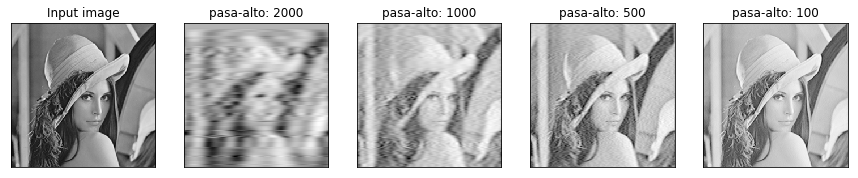

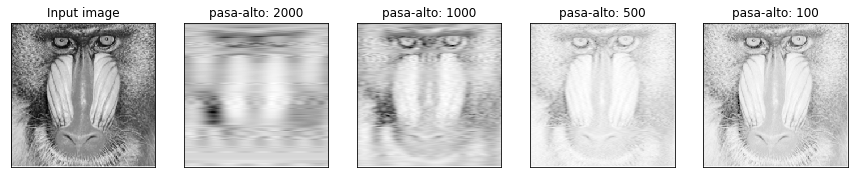

/home/jefferson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log10


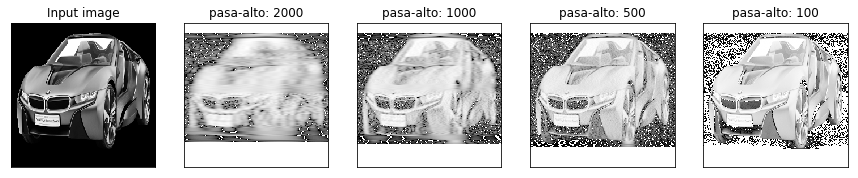

In [38]:
c_2000 = compress_fft
c_1000 = lambda x: compress_fft(x, eps=1000)
c_500 = lambda x: compress_fft(x, eps=500)
c_100 = lambda x: compress_fft(x, eps=100)

for p in real_images_paths:
    show_image(p, [c_2000, c_1000, c_500, c_100], labels=["pasa-alto: 2000", "pasa-alto: 1000", "pasa-alto: 500", "pasa-alto: 100"])

**Análisis FFT en Imágenes sintéticas** en este a pesar de usar un filtro alto se puede ver todavía el contenido de la imagen original en la mayoría de imágenes 

/home/jefferson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log10


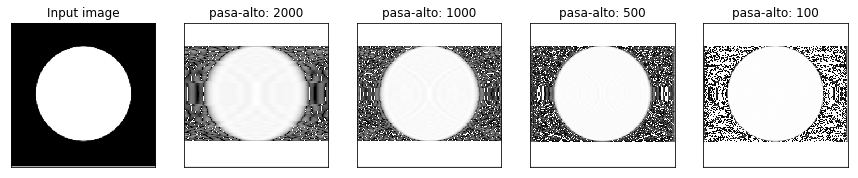

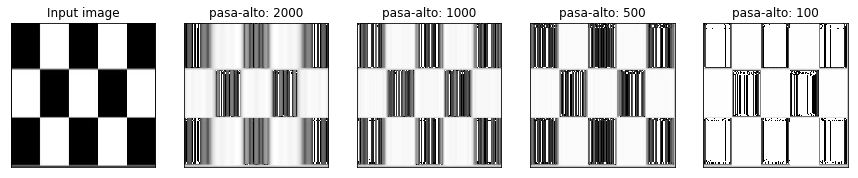

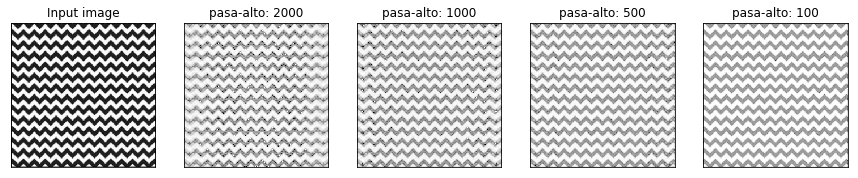

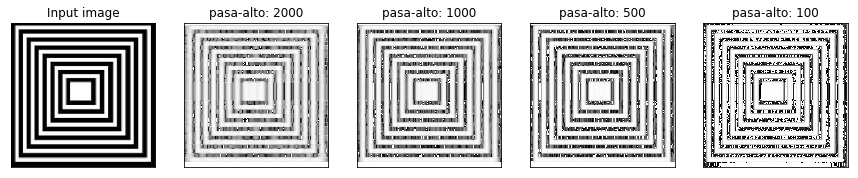

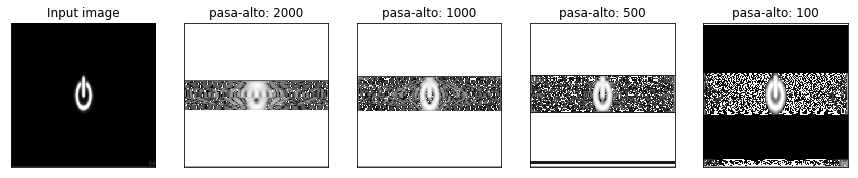

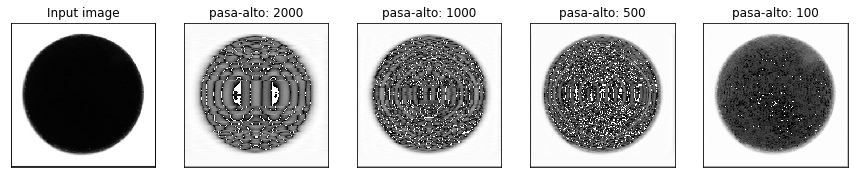

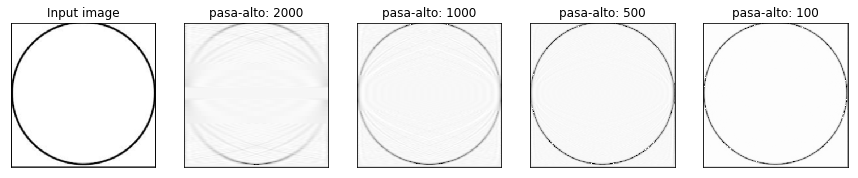

In [39]:
for p in syntetic_images_paths:
    show_image(p, [c_2000, c_1000, c_500, c_100], labels=["pasa-alto: 2000", "pasa-alto: 1000", "pasa-alto: 500", "pasa-alto: 100"])

**Análisis con DCT en imágenes reales** podemos ver que dejando aproximadamente el 60% de los coeficientes de la transformada coseno se puede tener aún una muy buena imagen en términos de contornos (lo que significa que prácticamente se comprime un 40% de la información), aunque hay que tener en cuenta que mucha de la información del color se pierde (cómo se ve en la última imagen)

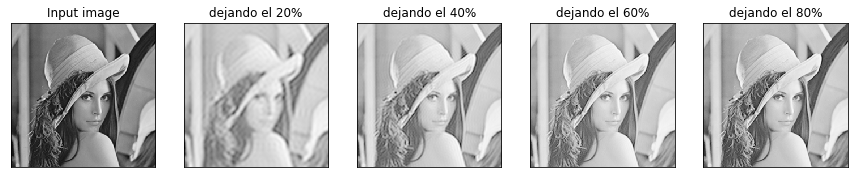

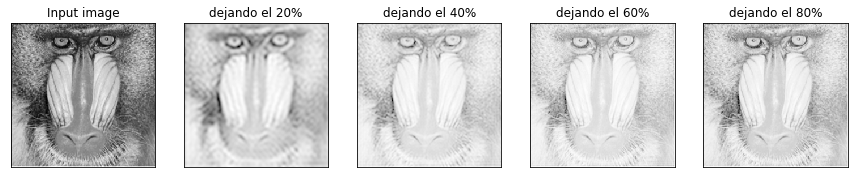

/home/jefferson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log10


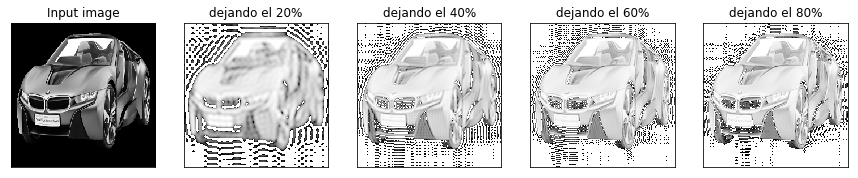

In [40]:
c_80 = lambda x: compress_with_filter(x, percentage=0.80)
c_60 = lambda x: compress_with_filter(x, percentage=0.60)
c_40 = lambda x: compress_with_filter(x, percentage=0.40)
c_20 = lambda x: compress_with_filter(x, percentage=0.20)

for p in real_images_paths:
    show_image(p, [c_20, c_40, c_60, c_80], labels=["dejando el 20%", "dejando el 40%", "dejando el 60%", "dejando el 80%"])

**Análisis con DCT en imágenes sintéticas** ocurre lo mismo que con las imágenes anteriores pero ya en este caso se puede ver la gran pérdida de color que hay en las imágenes

/home/jefferson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log10


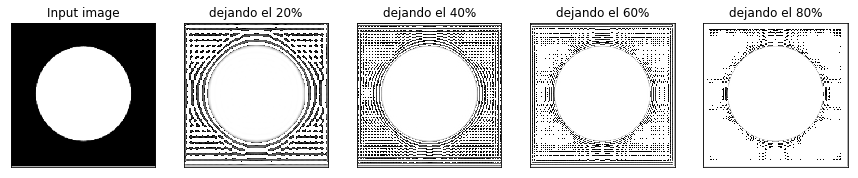

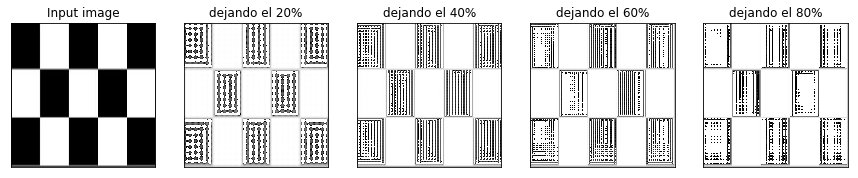

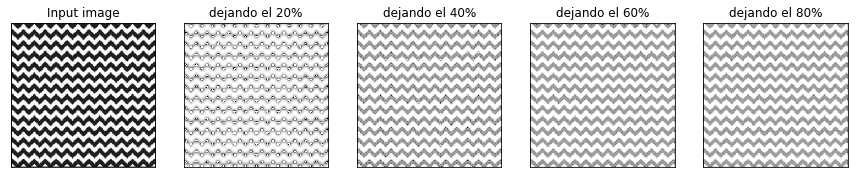

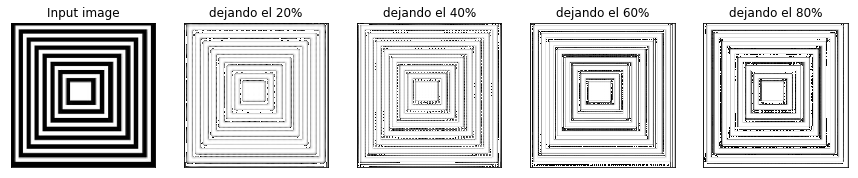

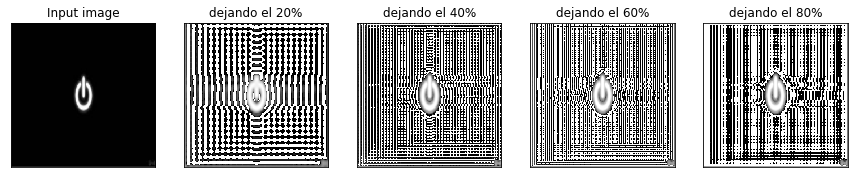

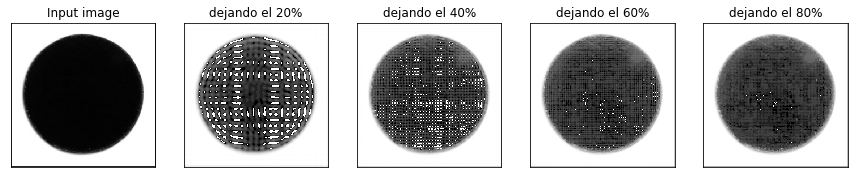

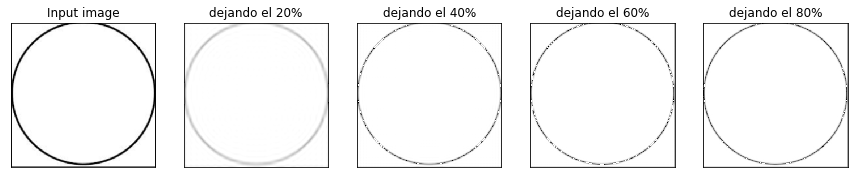

In [41]:
for p in syntetic_images_paths:
    show_image(p, [c_20, c_40, c_60, c_80], labels=["dejando el 20%", "dejando el 40%", "dejando el 60%", "dejando el 80%"])

**Análisis con DHT en imágenes reales** aplicando la misma transformación Hartley y usando el mismo método de compresión usado en la transformada coseno vemos que se pierde mucha información de la imagen, inclusive removiendo el 10% de los coeficientes vemos una imagen muy difuminada

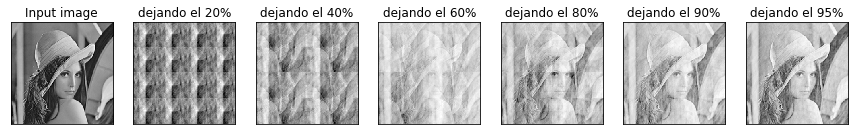

/home/jefferson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log10


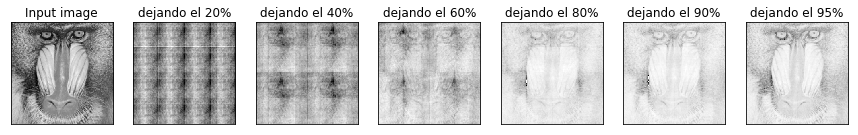

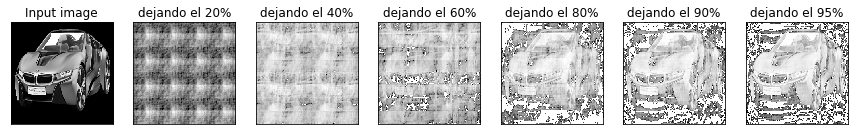

In [42]:
c_95 = lambda x: compress_with_filter(x, percentage=0.95, transform=hartley_transform, itransform=hartley_transform)
c_90 = lambda x: compress_with_filter(x, percentage=0.90, transform=hartley_transform, itransform=hartley_transform)
c_80 = lambda x: compress_with_filter(x, percentage=0.80, transform=hartley_transform, itransform=hartley_transform)
c_60 = lambda x: compress_with_filter(x, percentage=0.60, transform=hartley_transform, itransform=hartley_transform)
c_40 = lambda x: compress_with_filter(x, percentage=0.40, transform=hartley_transform, itransform=hartley_transform)
c_20 = lambda x: compress_with_filter(x, percentage=0.20, transform=hartley_transform, itransform=hartley_transform)

for p in real_images_paths:
    show_image(p, [c_20, c_40, c_60, c_80, c_90, c_95], 
               labels=["dejando el 20%", "dejando el 40%", "dejando el 60%", "dejando el 80%", "dejando el 90%", "dejando el 95%"])

**Análisis con DHT en imágenes sintéticas** acá se puede apreciar no solo que la imagen se logra preservar removiendo unos pocos coeficientes en la transformada, pareciera que la imagen se comprime de una manera más pequeña a medida que se remueven los coeficientes de la imagen, sería interesante ver cómo se comporta ese patrón de compresión

/home/jefferson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log10


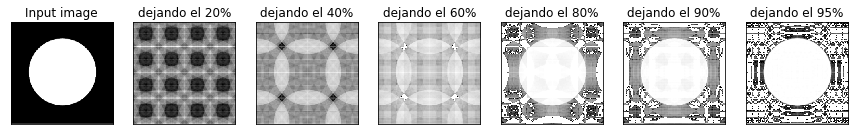

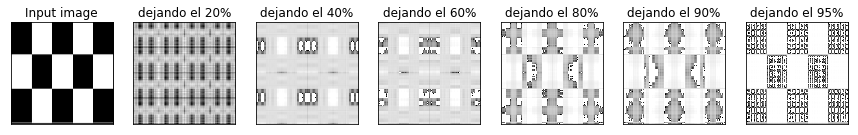

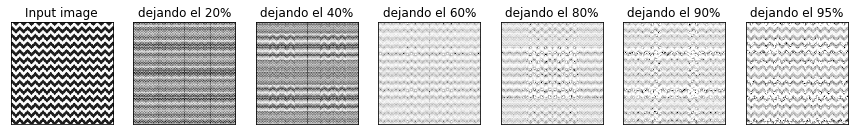

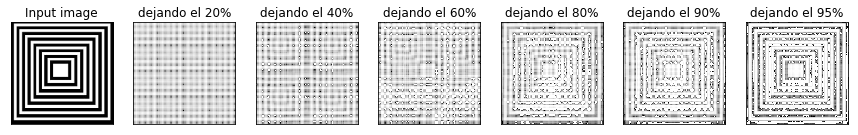

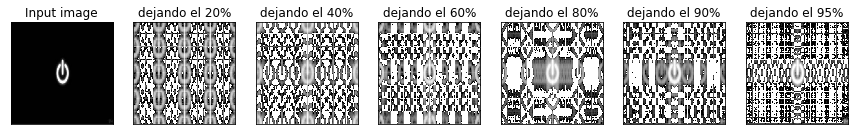

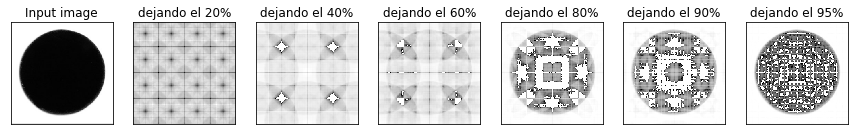

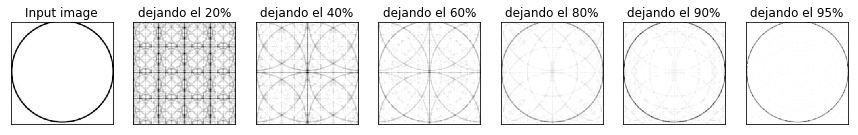

In [43]:
for p in syntetic_images_paths:
    show_image(p, [c_20, c_40, c_60, c_80, c_90, c_95], 
               labels=["dejando el 20%", "dejando el 40%", "dejando el 60%", "dejando el 80%", "dejando el 90%", "dejando el 95%"])

**Análisis con Walsh-Hadamard en imágenes reales** remover coeficientes de la transformada afecta grandemente a la reconstrucción de la image, solo en el último ejemplo es que se puede ver un poco la reconstrucción pero se pierde la gran mayoría de los datos

/home/jefferson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log10
/home/jefferson/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:897: UserWarning: Warning: converting a masked element to nan.
  dtype = np.min_scalar_type(value)
/home/jefferson/anaconda3/lib/python3.6/site-packages/numpy/ma/core.py:748: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


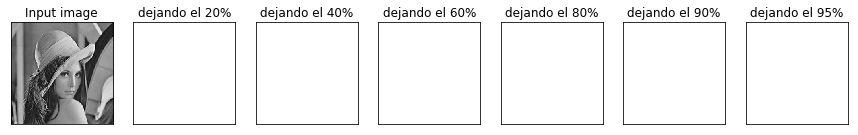

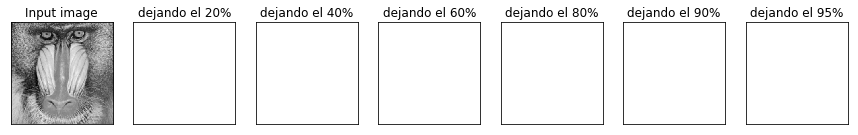

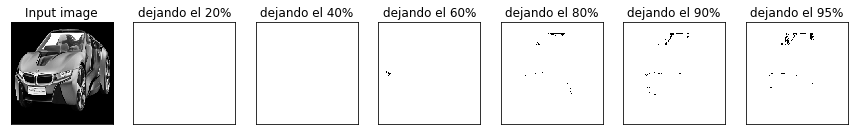

In [44]:
c_95 = lambda x: compress_with_filter(x, percentage=0.95, transform=hadamard_transform, itransform=hadamard_transform)
c_90 = lambda x: compress_with_filter(x, percentage=0.90, transform=hadamard_transform, itransform=hadamard_transform)
c_80 = lambda x: compress_with_filter(x, percentage=0.80, transform=hadamard_transform, itransform=hadamard_transform)
c_60 = lambda x: compress_with_filter(x, percentage=0.60, transform=hadamard_transform, itransform=hadamard_transform)
c_40 = lambda x: compress_with_filter(x, percentage=0.40, transform=hadamard_transform, itransform=hadamard_transform)
c_20 = lambda x: compress_with_filter(x, percentage=0.20, transform=hadamard_transform, itransform=hadamard_transform)

for p in real_images_paths:
    show_image(p, [c_20, c_40, c_60, c_80, c_90, c_95], 
               labels=["dejando el 20%", "dejando el 40%", "dejando el 60%", "dejando el 80%", "dejando el 90%", "dejando el 95%"])

**Análisis con Walsh-Hadamard en imágenes sintéticas** vemos que con formas simples en la imagen se puede reconstruir algo de los datos originales, pero el caso del ejemplo 5 es importante ya que muestra que no se puede recuperar la información con formas compleja, esto sería importante en el caso de que se quiera estudiar la complejidad de una imagen

/home/jefferson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log10
/home/jefferson/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:897: UserWarning: Warning: converting a masked element to nan.
  dtype = np.min_scalar_type(value)
/home/jefferson/anaconda3/lib/python3.6/site-packages/numpy/ma/core.py:748: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


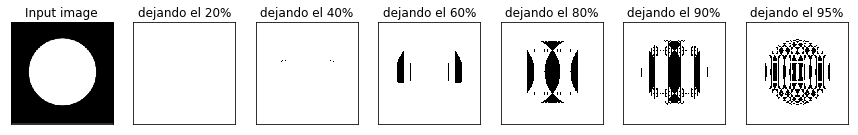

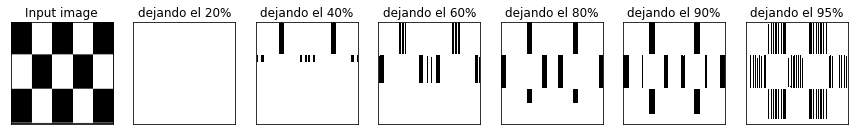

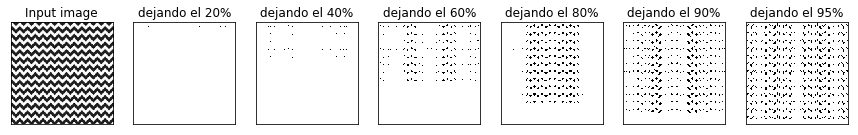

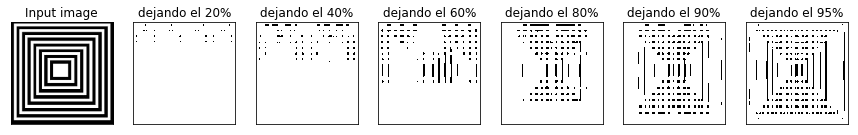

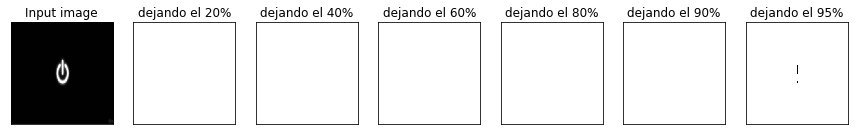

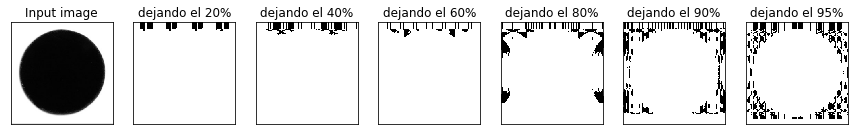

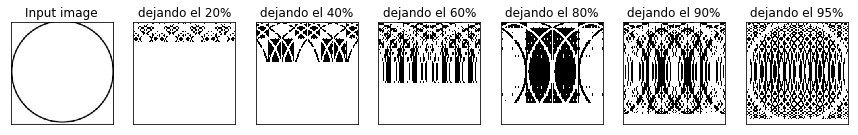

In [45]:
for p in syntetic_images_paths:
    show_image(p, [c_20, c_40, c_60, c_80, c_90, c_95], 
               labels=["dejando el 20%", "dejando el 40%", "dejando el 60%", "dejando el 80%", "dejando el 90%", "dejando el 95%"])

# Punto 3

Analice detalladamente el comportamiento, de al menos cuatro de las transformadas estudiadas, **cuando ellas son empleadas para reducción de ruido de imágenes.** Utilice imágenes reales y sintéticas

In [46]:
def nr_fft(img, eps=50000):
    coeff = fftpack.fft(img)
    coeff[abs(coeff) > eps] = 0
    output = np.abs(np.fft.ifft(coeff)).astype(np.int32)
    return output

**Análisis con FFT en imágenes reales** vemos que lo que hace la transformación es aclarar más la imagen y reducir un poco los bordes pero no tanto cómo se espera, además es mucho más difícil configurar la FFT para realizar este tipo de tarea, caso que no ocurren en la compresión (en la última imagen vemos que no realiza ningún proceso sobre ella, lo cual muestra que el filtro funciona dependiendo de la imagen)

/home/jefferson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log10


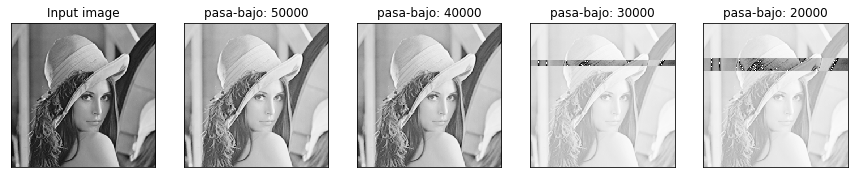

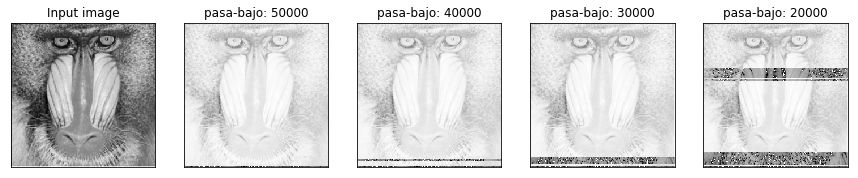

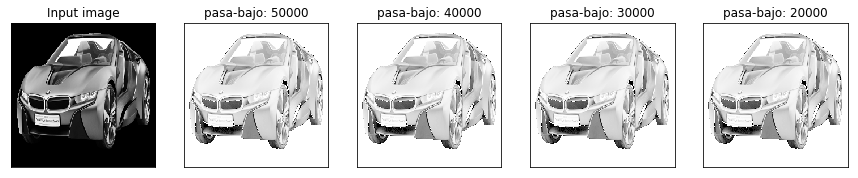

In [47]:
c_50000 = nr_fft
c_40000 = lambda x: nr_fft(x, eps=40000)
c_30000 = lambda x: nr_fft(x, eps=39000)
c_20000 = lambda x: nr_fft(x, eps=38000)

for p in real_images_paths:
    show_image(p, [c_50000, c_40000, c_30000, c_20000], 
               labels=["pasa-bajo: 50000", "pasa-bajo: 40000", "pasa-bajo: 30000", "pasa-bajo: 20000"])

**Análisis con FFT en imágenes sintéticas**  vemos que el filtro no es muy bueno reduciendo ruido en la imagen, como habíamos dicho anteriormente, para cada imagen se debe configurar el filtro pasa-bajo para que hayan resultados relevantes (lo cual no es sencillo), por ello es mejor usar un filtro gaussiano que un pasa-bajo.

/home/jefferson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log10


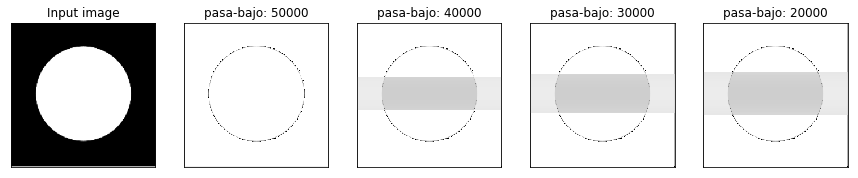

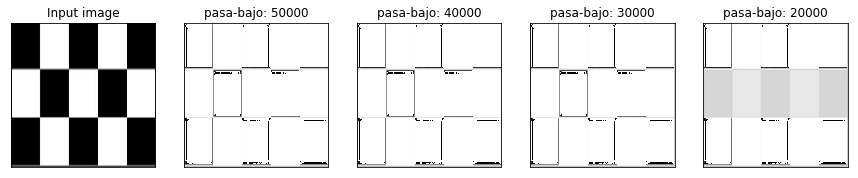

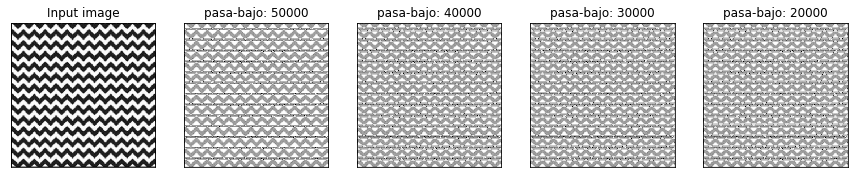

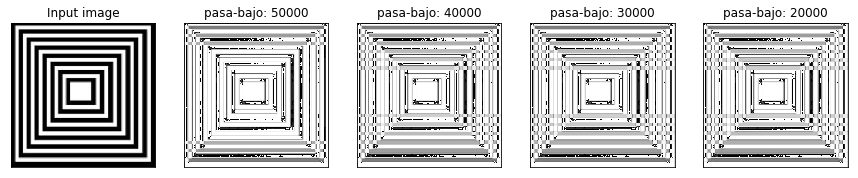

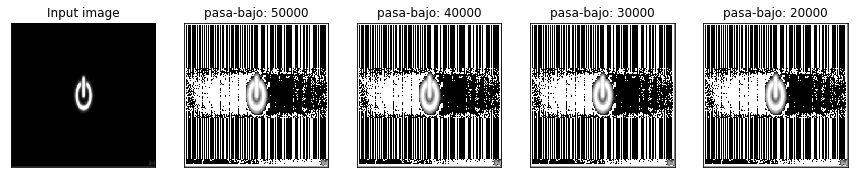

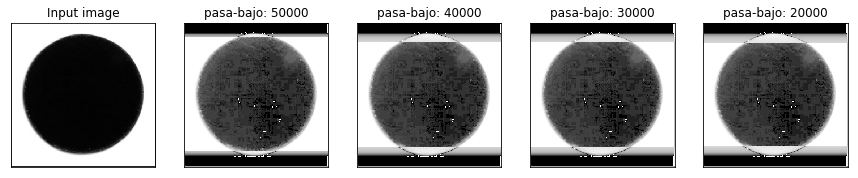

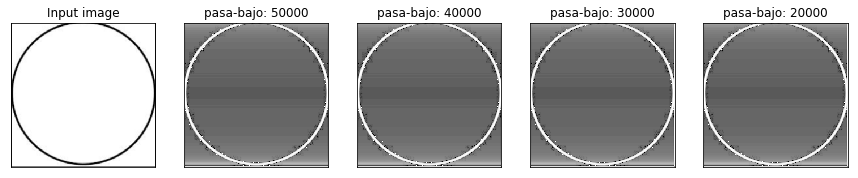

In [48]:
for p in syntetic_images_paths:
    show_image(p, [c_50000, c_40000, c_30000, c_20000], 
               labels=["pasa-bajo: 50000", "pasa-bajo: 40000", "pasa-bajo: 30000", "pasa-bajo: 20000"])

En el caso de reducción de ruido de imágenes para las demás transformadas, no existen maneras de hacer compresión de manera sencilla, hay ciertos casos que se pueden aplicar para cierto tipo de imágenes como los que muestran en las siguientes publicaciones:

* https://pdfs.semanticscholar.org/076f/a5a1b9310ac771561cba207f4f284e23b112.pdf
* http://ieeexplore.ieee.org/document/7438566/?reload=true
* http://ieeexplore.ieee.org/document/7870110/
* https://pdfs.semanticscholar.org/d3a5/856b039c70065487893fd8c6ebe906003e44.pdf
